In [21]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

## Import Library

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import time
from models.ffnn import FFNN

## Load Dataset

In [23]:
print("Downloading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
X = X.astype(float)
y = y.astype(int)

## Preprocessing

In [24]:
X = np.array(X)
y = np.array(y)

In [25]:
X = X / 255.0

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))

In [28]:
input_size = 784
hidden_sizes = [64] 
output_size = 10

## Experiment 1
Fungsi aktivasi: Linear


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.5922
Epoch 2/10, Train Loss: 0.3581
Epoch 3/10, Train Loss: 0.3259
Epoch 4/10, Train Loss: 0.3101
Epoch 5/10, Train Loss: 0.3001
Epoch 6/10, Train Loss: 0.2930
Epoch 7/10, Train Loss: 0.2874
Epoch 8/10, Train Loss: 0.2831
Epoch 9/10, Train Loss: 0.2793
Epoch 10/10, Train Loss: 0.2763
Custom FFNN training time: 11.48 seconds
Accuracy: 0.9174285714285715


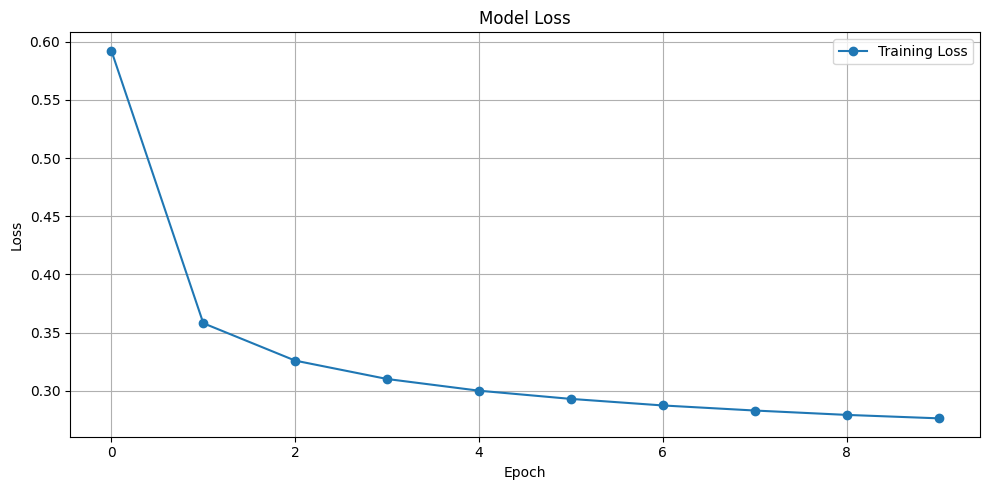

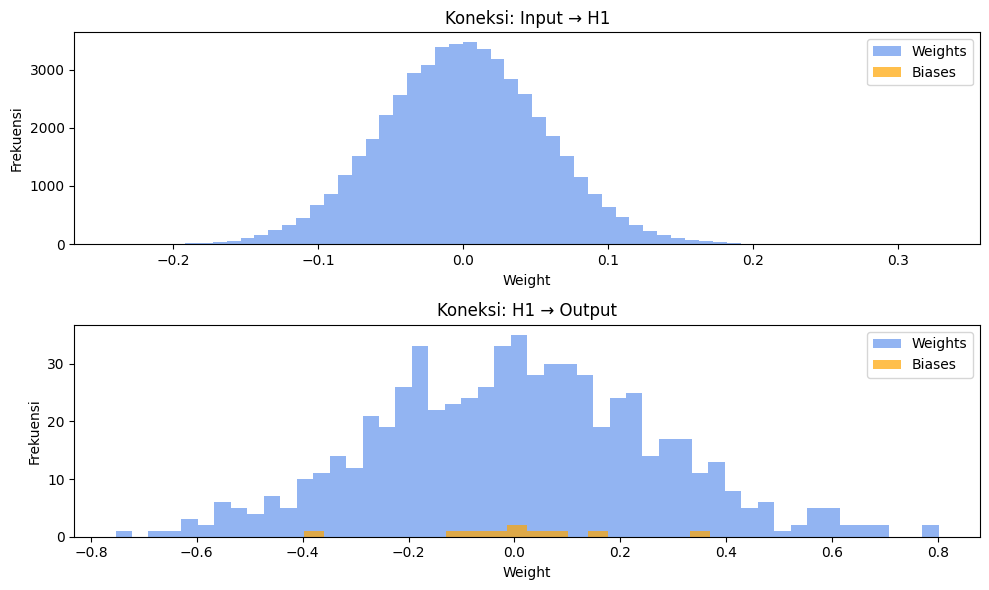

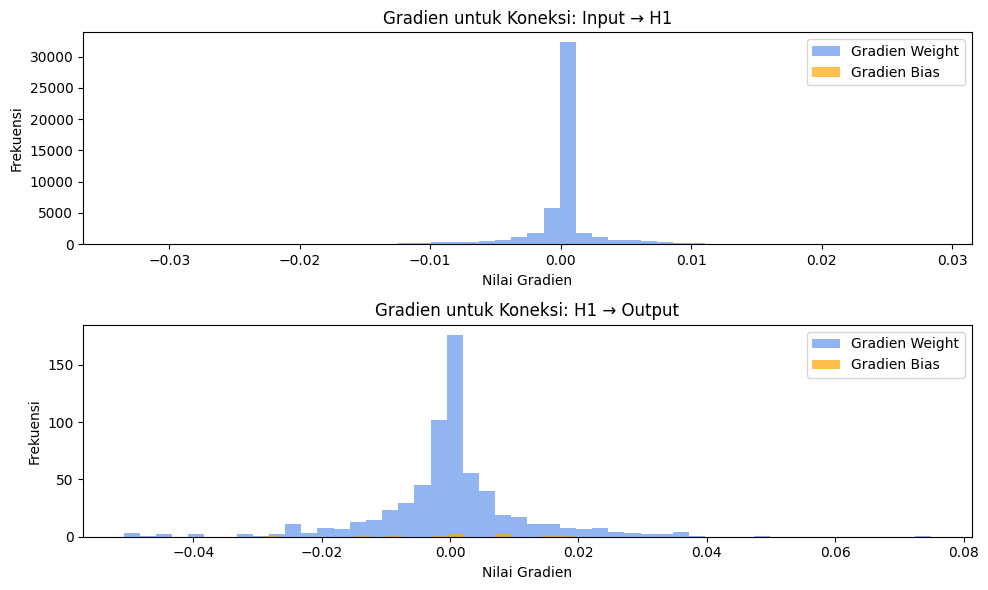

In [29]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['linear'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()

## Experiment 2
Fungsi aktivasi: ReLU


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.6828
Epoch 2/10, Train Loss: 0.3497
Epoch 3/10, Train Loss: 0.3029
Epoch 4/10, Train Loss: 0.2741
Epoch 5/10, Train Loss: 0.2514
Epoch 6/10, Train Loss: 0.2323
Epoch 7/10, Train Loss: 0.2164
Epoch 8/10, Train Loss: 0.2027
Epoch 9/10, Train Loss: 0.1907
Epoch 10/10, Train Loss: 0.1802
Custom FFNN training time: 11.43 seconds
Accuracy: 0.9456428571428571


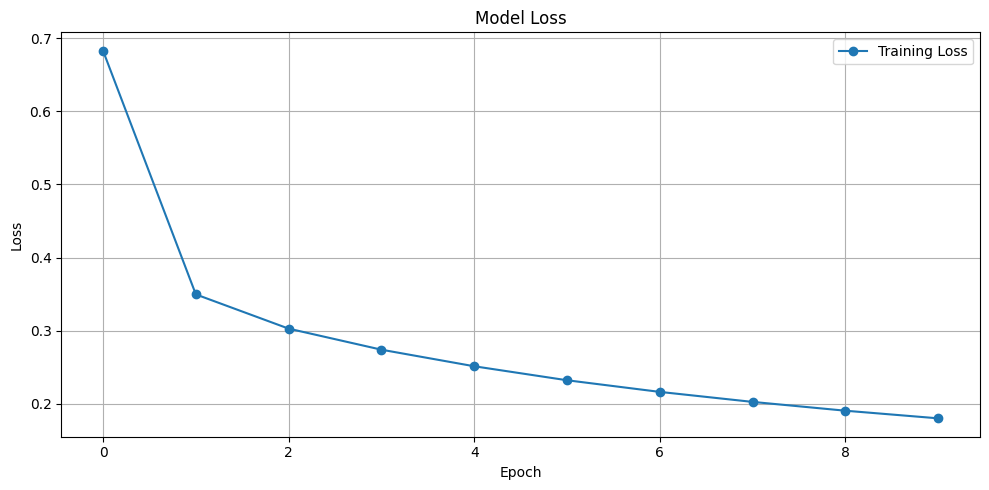

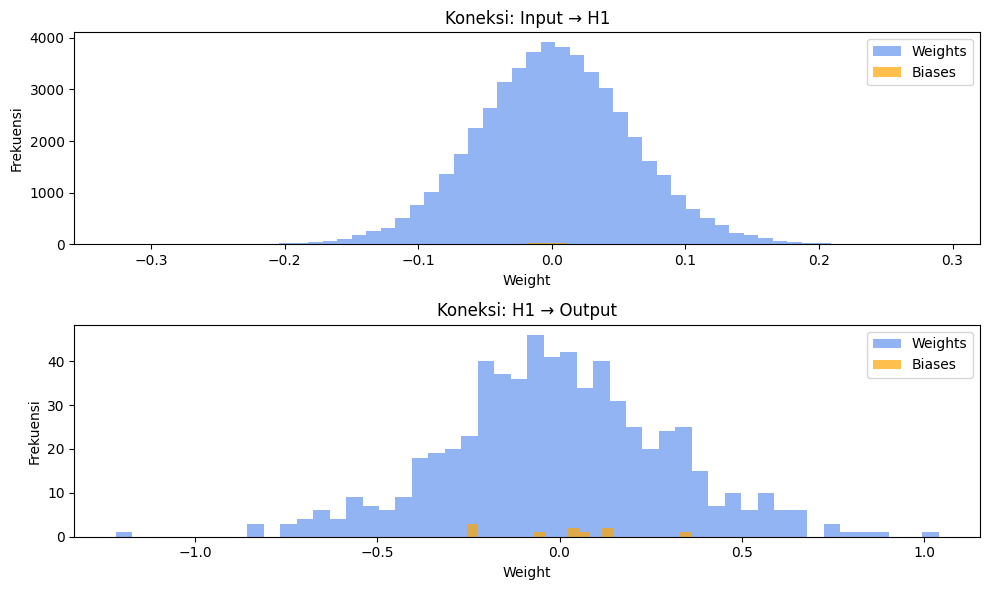

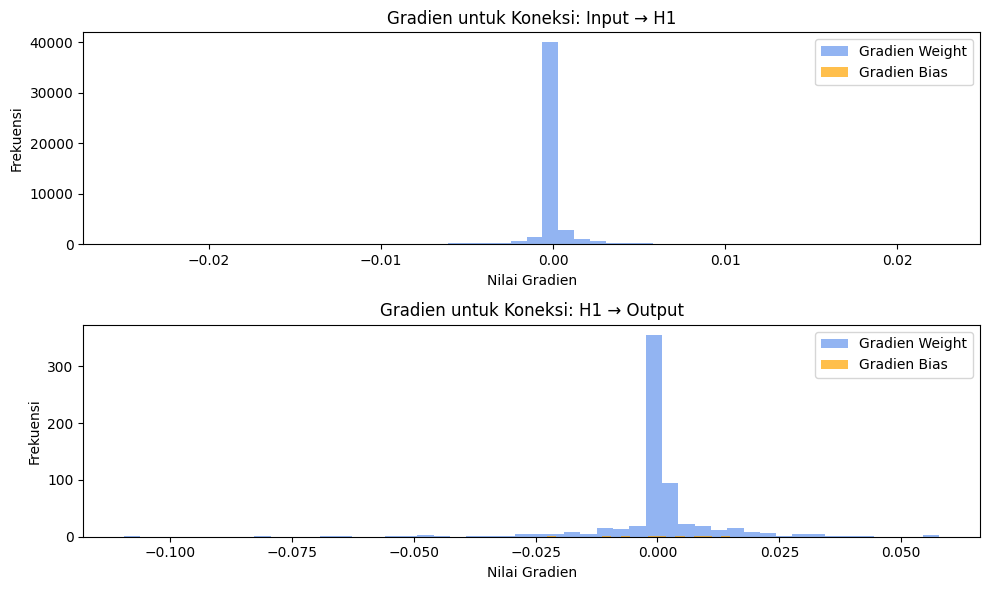

In [30]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['relu'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()

## Experiment 3
Fungsi aktivasi: Sigmoid


Training custom FFNN model...
Epoch 1/10, Train Loss: 1.5295
Epoch 2/10, Train Loss: 0.7954
Epoch 3/10, Train Loss: 0.5827
Epoch 4/10, Train Loss: 0.4882
Epoch 5/10, Train Loss: 0.4350
Epoch 6/10, Train Loss: 0.4008
Epoch 7/10, Train Loss: 0.3768
Epoch 8/10, Train Loss: 0.3588
Epoch 9/10, Train Loss: 0.3444
Epoch 10/10, Train Loss: 0.3327
Custom FFNN training time: 11.90 seconds
Accuracy: 0.9085714285714286


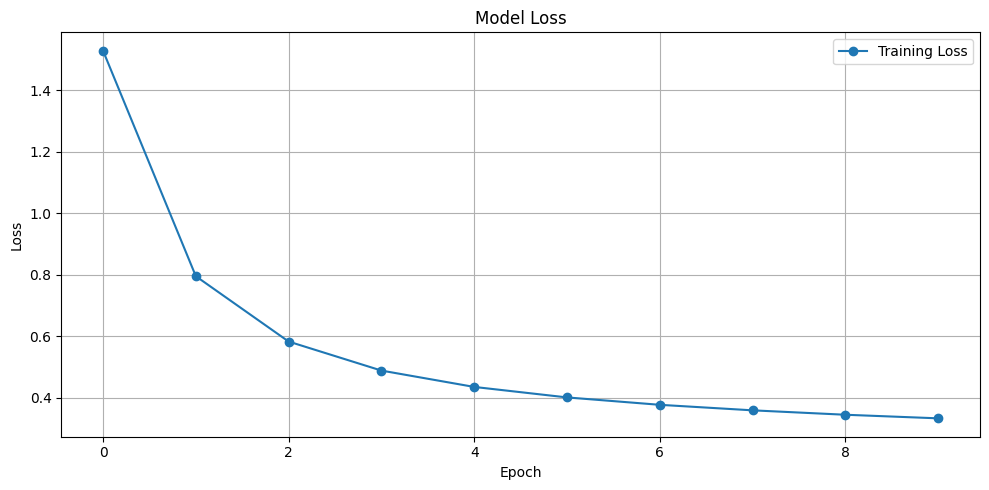

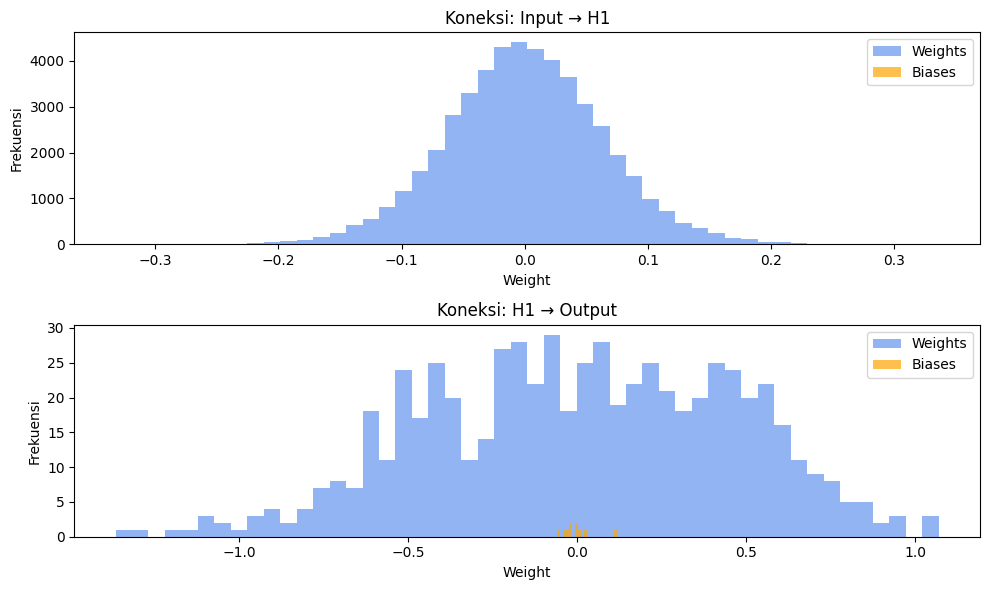

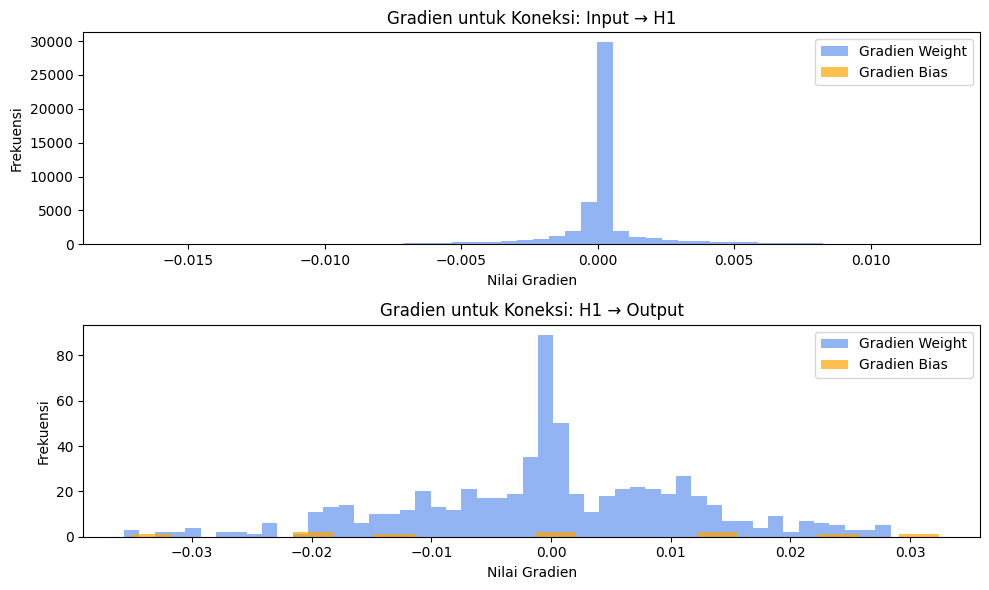

In [31]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['sigmoid'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()

## Experiment 4
Fungsi aktivasi: Hyperbolic Tangent (tanh)


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.6782
Epoch 2/10, Train Loss: 0.3735
Epoch 3/10, Train Loss: 0.3218
Epoch 4/10, Train Loss: 0.2934
Epoch 5/10, Train Loss: 0.2727
Epoch 6/10, Train Loss: 0.2561
Epoch 7/10, Train Loss: 0.2418
Epoch 8/10, Train Loss: 0.2294
Epoch 9/10, Train Loss: 0.2183
Epoch 10/10, Train Loss: 0.2082
Custom FFNN training time: 12.20 seconds
Accuracy: 0.9386428571428571


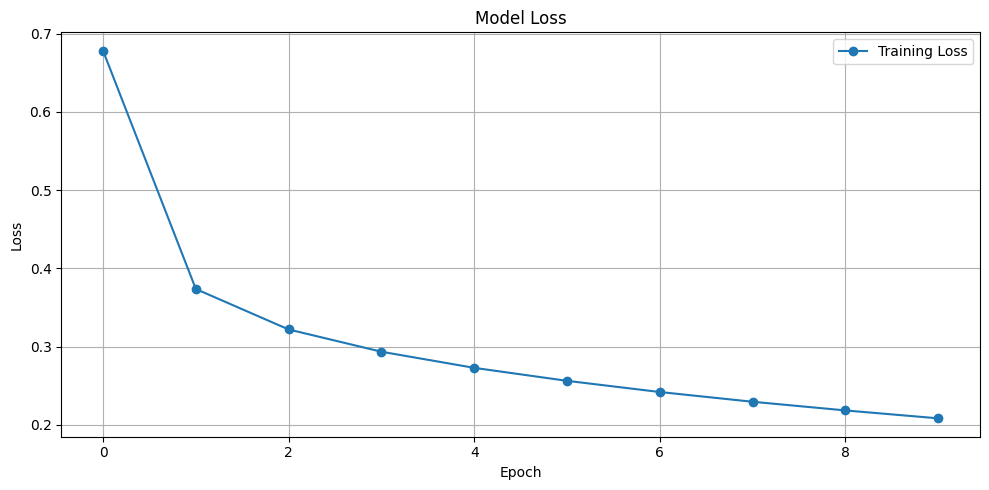

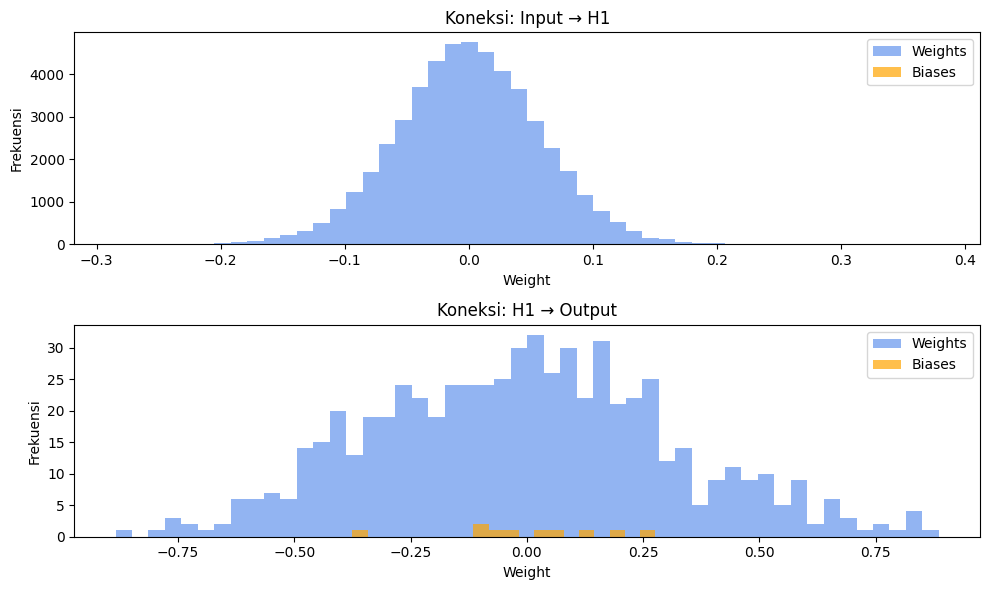

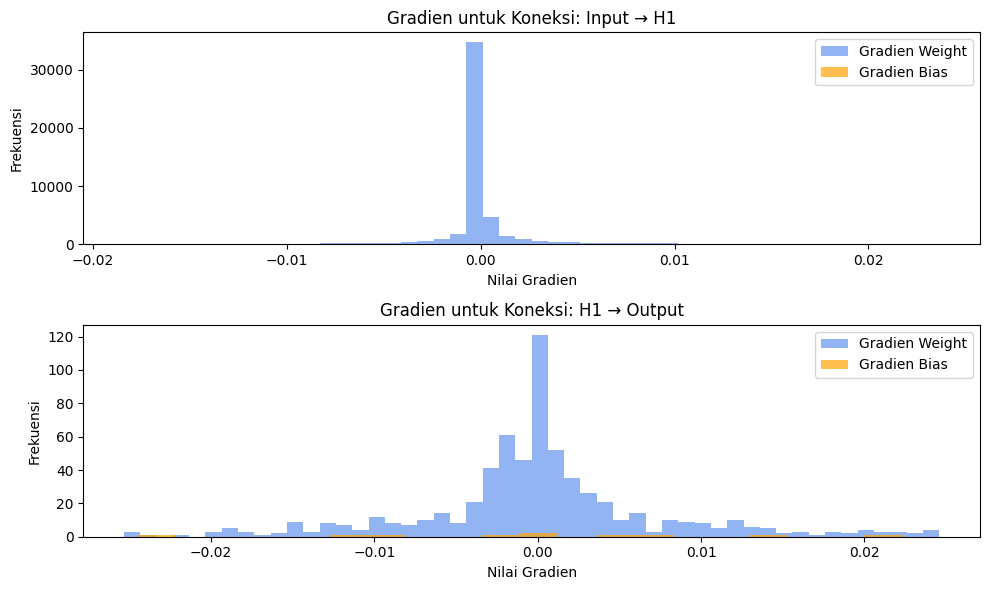

In [32]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['tanh'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()

## Experiment 5
Fungsi aktivasi: Leaky ReLU


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.6550
Epoch 2/10, Train Loss: 0.3350
Epoch 3/10, Train Loss: 0.2851
Epoch 4/10, Train Loss: 0.2556
Epoch 5/10, Train Loss: 0.2345
Epoch 6/10, Train Loss: 0.2181
Epoch 7/10, Train Loss: 0.2045
Epoch 8/10, Train Loss: 0.1931
Epoch 9/10, Train Loss: 0.1829
Epoch 10/10, Train Loss: 0.1742
Custom FFNN training time: 13.43 seconds
Accuracy: 0.9474285714285714


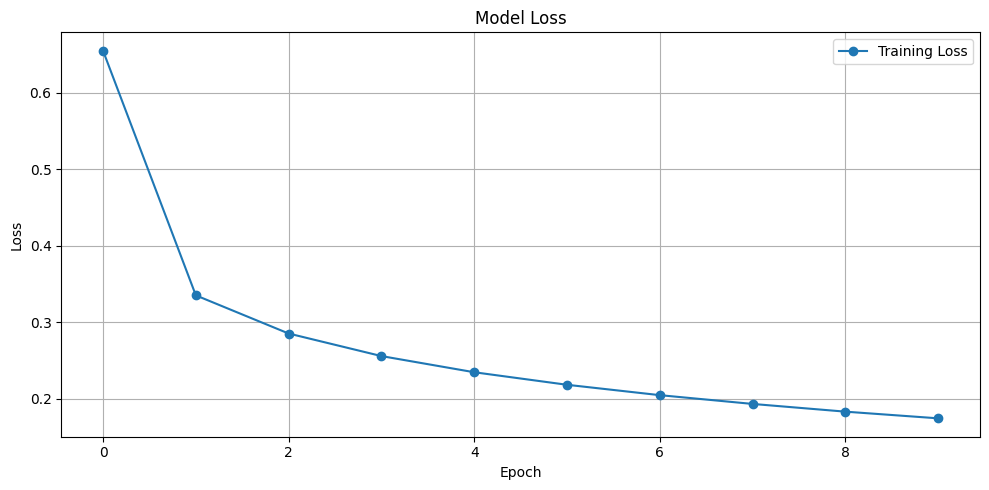

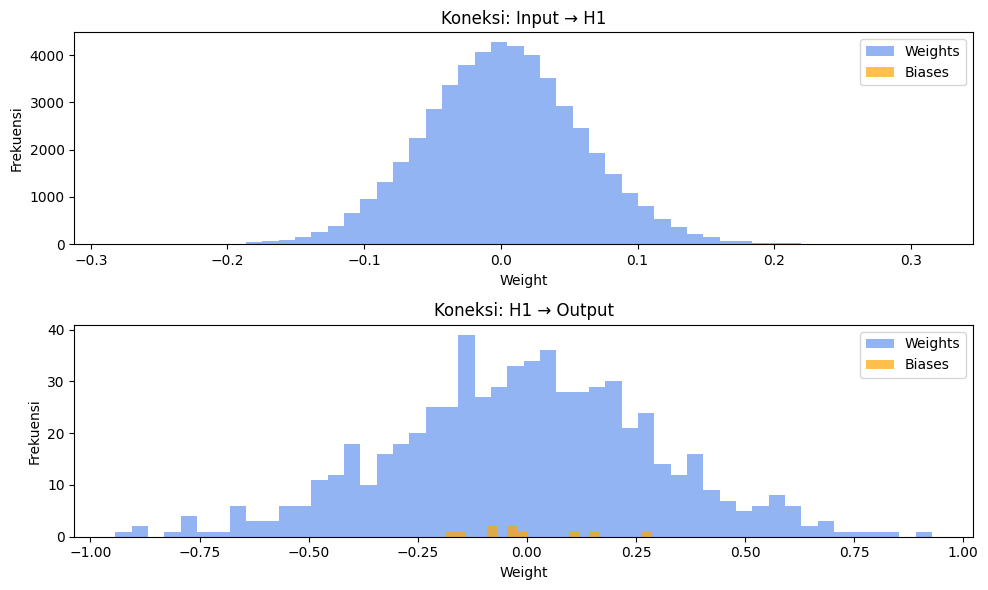

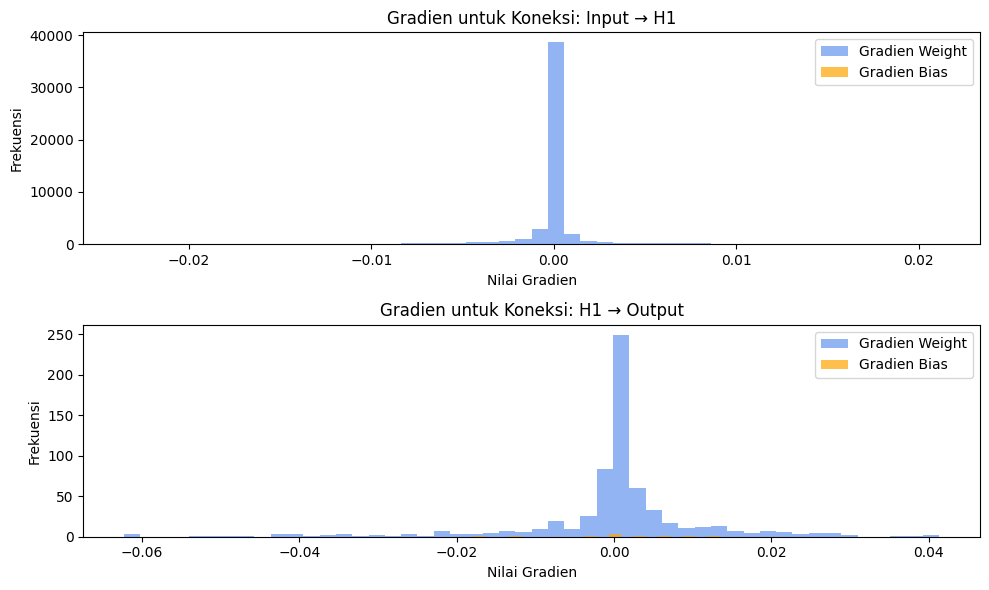

In [33]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['leaky_relu'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()

## Experiment 6
Fungsi aktivasi: Exponential ReLU


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.6156
Epoch 2/10, Train Loss: 0.3567
Epoch 3/10, Train Loss: 0.3188
Epoch 4/10, Train Loss: 0.2982
Epoch 5/10, Train Loss: 0.2825
Epoch 6/10, Train Loss: 0.2685
Epoch 7/10, Train Loss: 0.2560
Epoch 8/10, Train Loss: 0.2438
Epoch 9/10, Train Loss: 0.2330
Epoch 10/10, Train Loss: 0.2224
Custom FFNN training time: 11.96 seconds
Accuracy: 0.9360714285714286


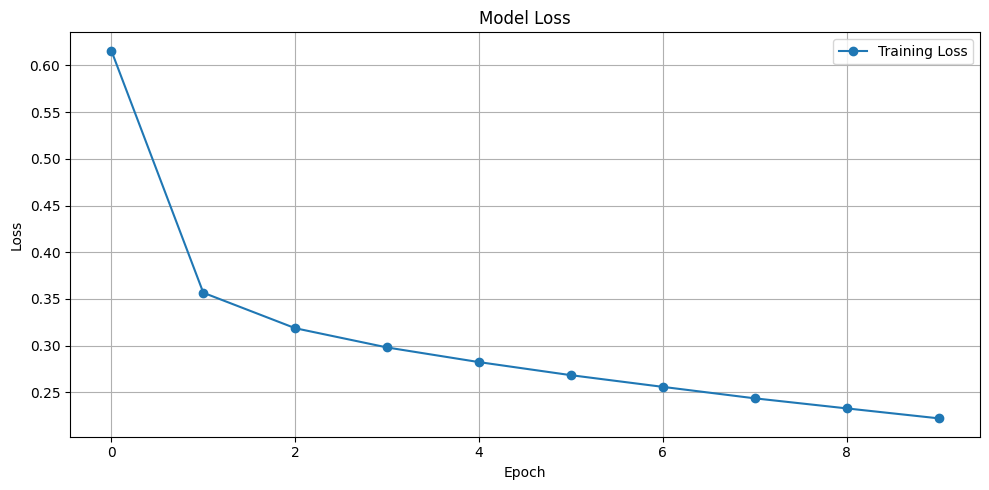

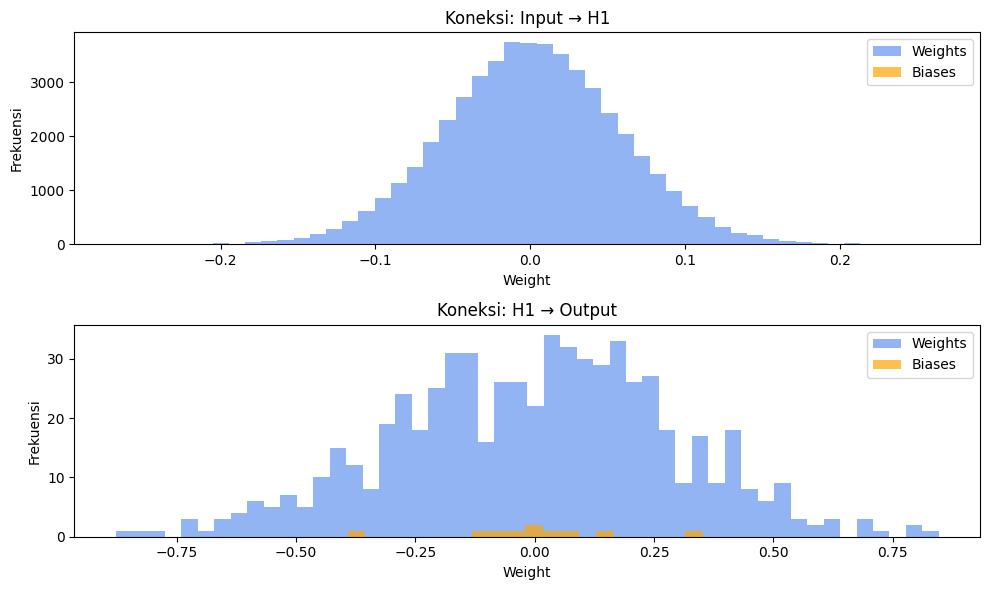

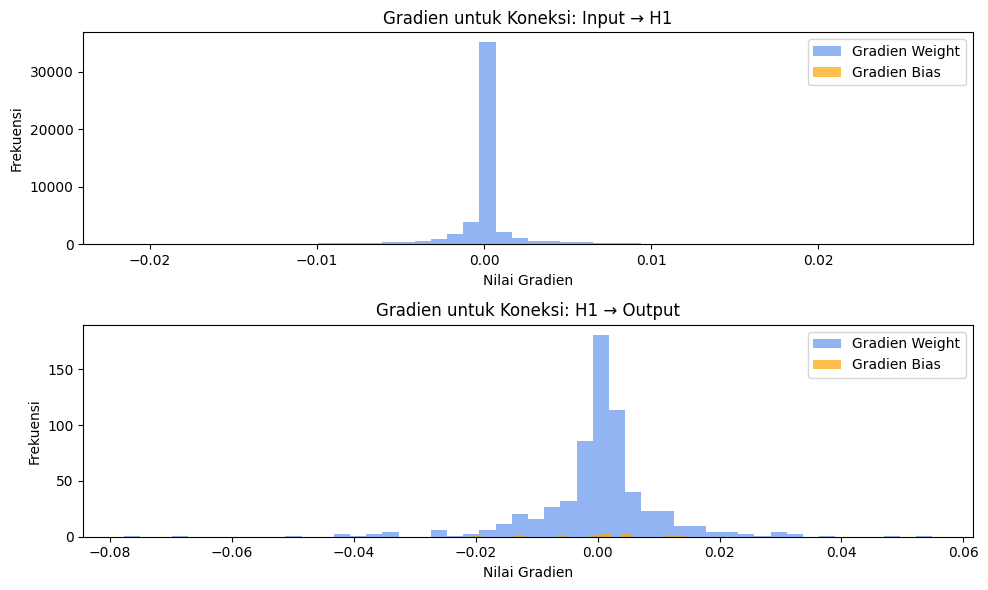

In [34]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['exponential_relu'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()